<a href="https://colab.research.google.com/github/abakm/AL-ML_Assignment-1/blob/master/Assignment05Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras  import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


In [16]:
# Load dataset
df = pd.read_csv('./mobile_price_classification.csv')
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [42]:
# Basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")
print(f"shape: {df.shape} ")
print(f"info: {df.info()} ")
print(f"statisitical summary: {df.describe()}")

Dataset shape: (2000, 21)
Features: ['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam', '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
shape: (2000, 21) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  


In [17]:
# checking for null values
print(df.isnull().sum())


# removing duplicates
df.drop_duplicates(inplace=True)

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64


In [18]:
# set feature and target
x, y = df.values[:,:-1], df.values[:,-1]
# y = to_categorical(y)

# convert to float
x = x.astype('float32')

In [19]:
# split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1600, 20) (1600,) (400, 20) (400,)


In [20]:
# Scale
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
# create model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# fit the model
model.fit(x_train, y_train, epochs=150, batch_size=32,  verbose=1)

Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2710 - loss: 1.5725
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2716 - loss: 1.4377
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2818 - loss: 1.3789
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3271 - loss: 1.3494
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3559 - loss: 1.3268
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3875 - loss: 1.2930
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3718 - loss: 1.2760
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4081 - loss: 1.2490
Epoch 9/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4550 - loss: 1.2073
Epoch 10/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4824 - loss: 1.1712
Epoch 11/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5367 - loss: 1.0936
Epoch 12/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [24]:
# evalute the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9431 - loss: 0.1069
Test Accuracy: 0.95


In [25]:
# Predict the model
print(f"Features:{x_test[20]}  Target:{y_test[20]}")
prediction = model.predict(np.array([x_test[20]]))
print(f"Prediction:{prediction}")
prediction = np.argmax(prediction)
print(f"Prediction:{prediction}")


Features:[-0.46939084 -0.98142254  1.3249564   0.9704368  -0.53251183  0.9559684
  0.69985515 -0.70630443  1.3974035  -0.67379963 -0.9775748  -1.0380163
  0.10178165 -1.0617913   0.6612659  -1.0848686  -0.71864516  0.5571367
 -1.0100505  -0.9975031 ]  Target:0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Prediction:[[9.9985826e-01 1.4177008e-04 2.4144781e-10 3.1484909e-21]]
Prediction:0


## Hyperparmeter Tuning.

In [35]:
# Function to build and train model
def train_model(learning_rate, batch_size=8, epochs=50, optimizer = None):
  model = Sequential()
  model.add(Dense(10, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  if optimizer is None:
    optimizer = Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=0)
  return history

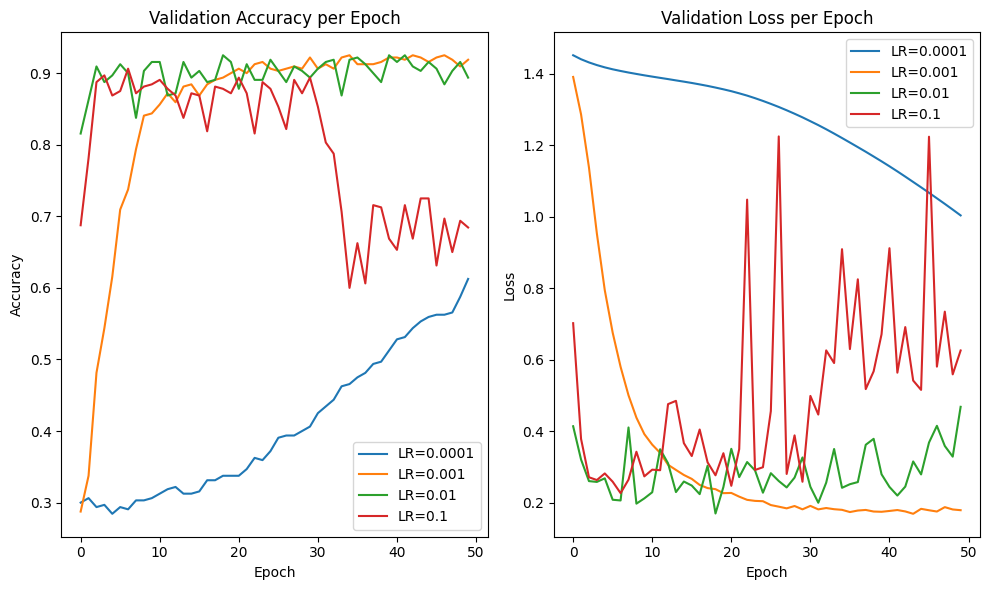

In [27]:
# Plot validation accuracy and loss
histories = list()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
rates = [0.0001, 0.001, 0.01, 0.1]
for rate in rates:
    history = train_model(learning_rate=rate)
    histories.append(history.history)


for index, history in enumerate(histories):
  plt.plot(history['val_accuracy'], label=f'LR={rates[index]}')


plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for index, history in enumerate(histories):
  plt.plot(history['val_loss'], label=f'LR={rates[index]}')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


LR=0.001 (orange) - BEST CHOICE:

Smooth, steady improvement in validation accuracy
Stable, consistent decrease in validation loss
No erratic fluctuations - the curves are clean and predictable
Good convergence without overfitting signs
Balanced learning pace - not too slow, not too aggressive

### Tuning BatchSize

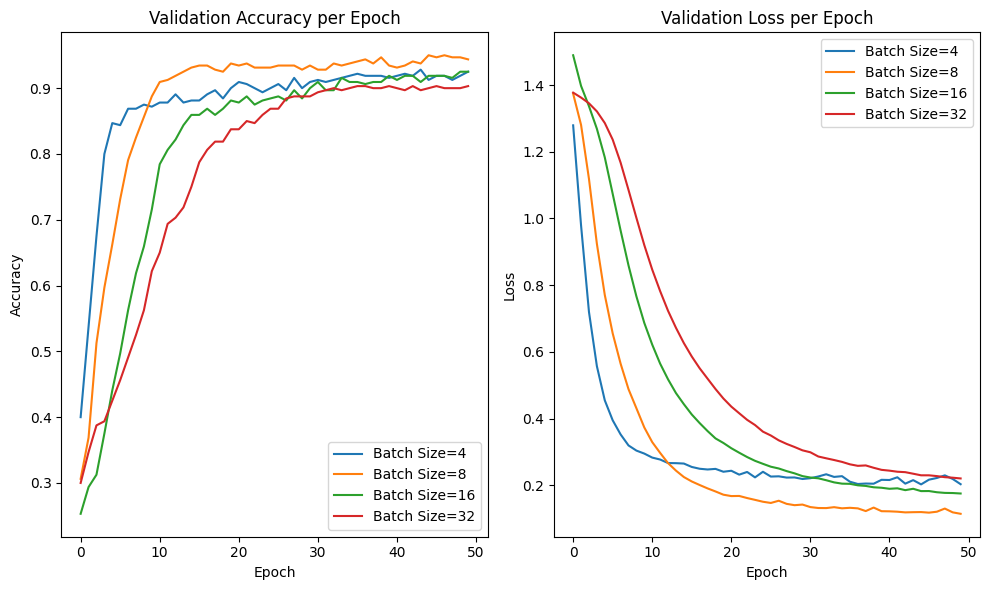

In [29]:
# Plot validation accuracy and loss
histories = list()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
batch_sizes = [4, 8, 16, 32]
for batch_size in batch_sizes:
    history = train_model(learning_rate=0.001, batch_size=batch_size)
    histories.append(history.history)


for index, history in enumerate(histories):
  plt.plot(history['val_accuracy'], label=f'Batch Size={batch_sizes[index]}')


plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for index, history in enumerate(histories):
  plt.plot(history['val_loss'], label=f'Batch Size={batch_sizes[index]}')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Batch Size = 8 (orange) - BEST CHOICE:

high accuracy
Smoothest learning curves with minimal noise
Lowest final validation loss
Stable performance -
Good balance between speed and stability

## Tuning no of epoches

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


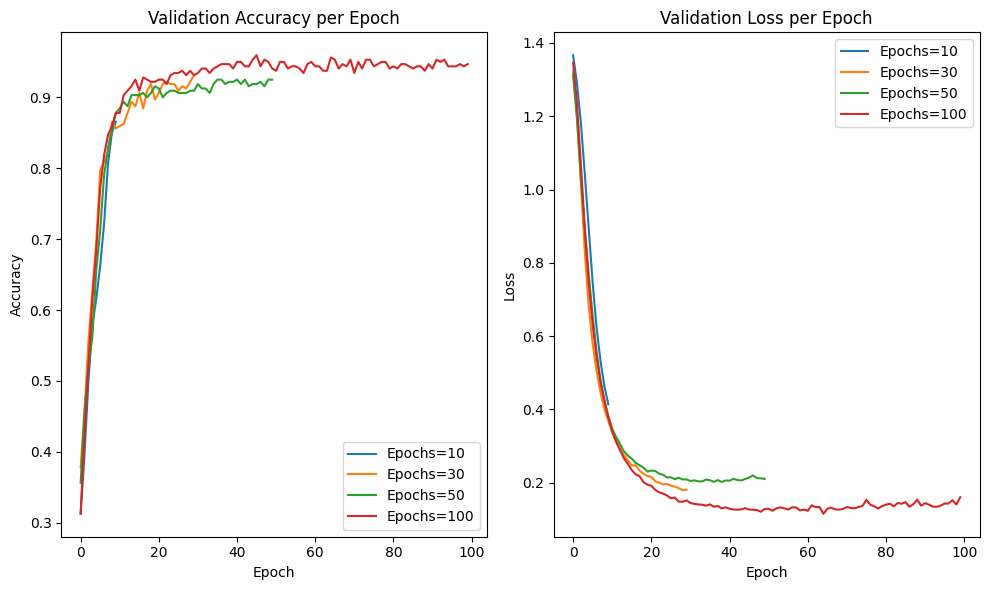

In [34]:
# Plot validation accuracy and loss
histories = list()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
epoches = [10, 30, 50, 100]
for epoch in epoches:
    history = train_model(learning_rate=0.001, batch_size=8, epochs=epoch)
    histories.append(history.history)


for index, history in enumerate(histories):
  plt.plot(history['val_accuracy'], label=f'Epochs={epoches[index]}')


plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for index, history in enumerate(histories):
  plt.plot(history['val_loss'], label=f'Epochs={epoches[index]}')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


50 Epochs (green) - BEST CHOICE:

High accuracy

Smooth loss

No signs of overfitting

### Optimizer Tuning

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


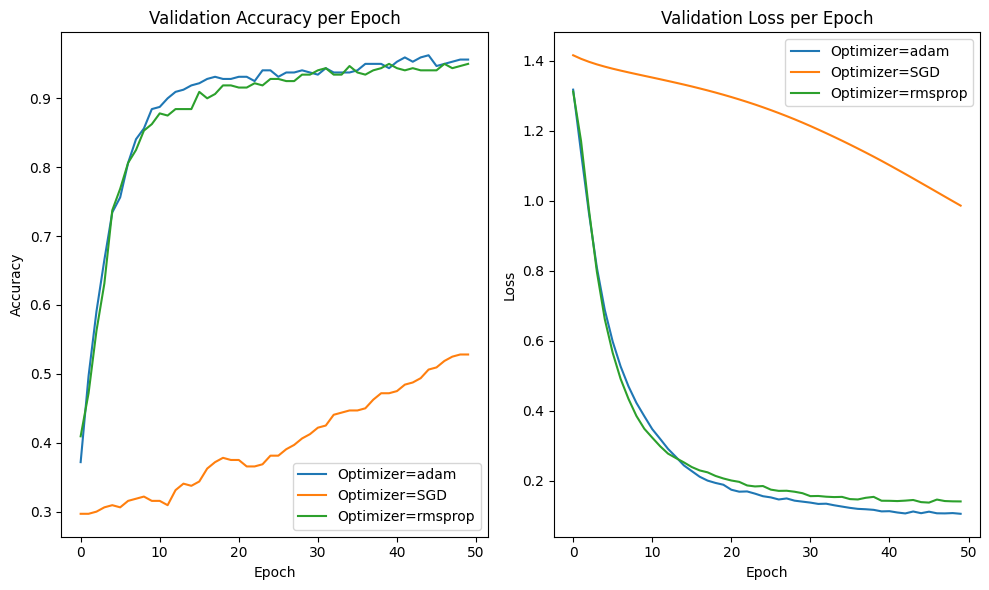

In [37]:
# Plot validation accuracy and loss
histories = list()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
optimizers =[ Adam(learning_rate=0.001), SGD(learning_rate=0.001), RMSprop(learning_rate=0.001)]
for optimizer in  optimizers:
    history = train_model(learning_rate=0.001, batch_size=8, epochs=50, optimizer=optimizer)
    histories.append(history.history)


for index, history in enumerate(histories):
  plt.plot(history['val_accuracy'], label=f'Optimizer={optimizers[index].name}')


plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for index, history in enumerate(histories):
  plt.plot(history['val_loss'], label=f'Optimizer={optimizers[index].name}')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Adam (blue) - BEST CHOICE:

high accuracy
Lowest final validation loss
Smooth, stable learning curves with minimal noise